In [79]:
import xarray_beam as xb

ds, _ = xb.open_zarr('gcs://gcp-public-data-arco-era5/ar/1959-2022-6h-240x121_equiangular_with_poles_conservative.zarr')

In [80]:
temp = ds['2m_temperature']

In [102]:
import numpy as np
import pandas as pd

start_date = pd.to_datetime('2021-03-08')
end_date = pd.to_datetime('2021-03-09')
source_dataset = temp.sel(time=slice(start_date, end_date))

print(source_dataset)

lat_min, lat_max = (0, 80)
lon_min, lon_max = (0, 180)

  # 해당 범위에 속하는 위도와 경도의 인덱스 찾기
lat_indices = np.where((source_dataset.latitude >= lat_min) & (source_dataset.latitude <= lat_max))[0]
lon_indices = np.where((source_dataset.longitude >= lon_min) & (source_dataset.longitude <= lon_max))[0]

source_dataset = source_dataset.isel(latitude=lat_indices, longitude=lon_indices)

<xarray.DataArray '2m_temperature' (time: 5, longitude: 240, latitude: 121)>
[145200 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 -90.0 -88.5 -87.0 -85.5 ... 87.0 88.5 90.0
  * longitude  (longitude) float64 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
  * time       (time) datetime64[ns] 2021-03-08 ... 2021-03-09
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K


In [103]:
print(source_dataset)

<xarray.DataArray '2m_temperature' (time: 5, longitude: 121, latitude: 54)>
[32670 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 0.0 1.5 3.0 4.5 6.0 ... 75.0 76.5 78.0 79.5
  * longitude  (longitude) float64 0.0 1.5 3.0 4.5 ... 175.5 177.0 178.5 180.0
  * time       (time) datetime64[ns] 2021-03-08 ... 2021-03-09
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K


In [104]:
dataset = source_dataset.values

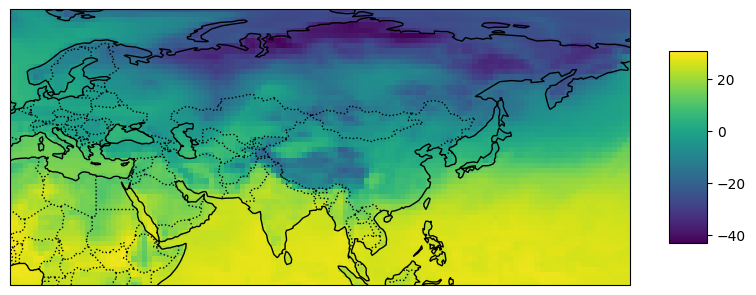

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 예제 NumPy 배열 생성
data = dataset[0].swapaxes(0, 1)

data = data - 273.15

# 지도 생성 및 데이터 시각화
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 지도에 기본 레이어 추가
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# NumPy 배열을 지도 위에 표시 (임의의 위경도 범위에 맞게 조정)
lons = np.linspace(lon_min, lon_max, data.shape[1])
lats = np.linspace(lat_min, lat_max, data.shape[0])
Lons, Lats = np.meshgrid(lons, lats)
mesh = ax.pcolormesh(Lons, Lats, data, transform=ccrs.PlateCarree())

plt.colorbar(mesh, ax=ax, shrink=0.5, aspect=5)

plt.show()

Text(124, 39.5, '1950년 07월 평균 기온')

/workspace/Haea/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/workspace/Haea/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/workspace/Haea/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/workspace/Haea/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/workspace/Haea/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/workspace/Haea/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 507

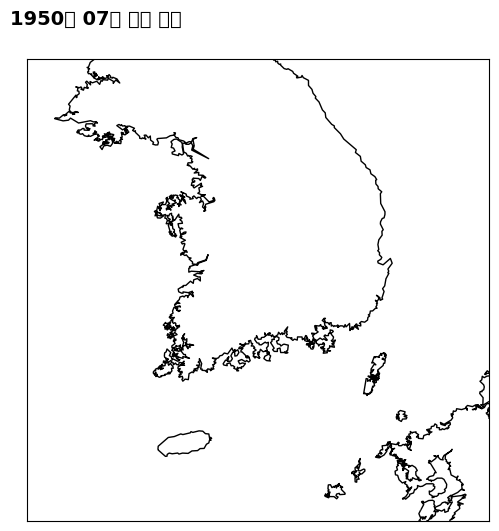

In [32]:
from mpl_toolkits.basemap import Basemap, cm
m= Basemap(llcrnrlon=min(source_dataset.longitude),llcrnrlat=min(source_dataset.latitude),urcrnrlon=max(source_dataset.longitude),urcrnrlat=max(source_dataset.latitude), resolution='i',projection='cyl',lon_0=(max(source_dataset.longitude)-min(source_dataset.longitude)) / 2,lat_0=(max(source_dataset.latitude)-min(source_dataset.latitude)) / 2)


m.drawcoastlines()
plt.text(124, 39.5,"1950년 07월 평균 기온", fontdict={'weight': 'bold', 'size': 14})